In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Scikitlearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#model evulation
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score

In [49]:
data = pd.read_csv("heart_cleveland_upload.csv")
df = data.copy() # datayı kopyaladık

In [50]:
df.head() # ilk verilere baktık

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [51]:
df.info() # null değer var mı kontrol ettik inceledik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


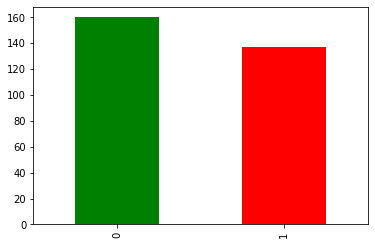

In [53]:
df['condition'].value_counts().plot(kind = "bar", color = ["green","red"]) 
#value_counts ile değerlerin adetlerini ayırdık
#.plot( ) ile görsele döktük  

In [54]:
df.describe().T
#describe ile içeriğini açıklama olarak döktük ve .T ile transpozunu aldık

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [55]:
#model 
X = df.drop("condition",axis = 1) #.drop() ile istediğimiz veriyi drop ettik yani çıkardık. 
#Çünkü eğitim yaparken bağımsız değişkenlerimiz condition harici hepsi oluyor bu durumda
y = df["condition"] #bağımlı değişkeni y değeri olarak aldık

In [43]:
 #train test splitting

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42) 
#test ve train için veriyi split ettik
#hangi verileri kullanıcağımızı içine verdik.


In [47]:
#kullanacağım modelleri tek bir dict'te topladık
models = {
    "logistic_regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier()
}
#modeli eğitip değerlerini bulması için fonksyion yazdık.
def fit_and_score(models,X_train,y_train,X_test,y_test):
  model_scores = {}
  for name,model in models.items(): # eğitim modellerinin içinde döndük.
    model.fit(X_train,y_train)#modeli x_train ve y_train kullanarak eğittik
    model_scores[name] = model.score(X_test,y_test) #model.score() ile birlikte test verilerimizi birleştirip hesaplatıp yeni dict'e attık
  return model_scores #dict return


In [48]:
model_scores = fit_and_score(models = models,X_train = X_train,y_train = y_train,X_test = X_test,y_test = y_test)
model_scores

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic_regression': 0.7333333333333333, 'KNN': 0.5666666666666667}